# Teoría

La integración numérica por medio del *método de Simpson* permite hallar una aproximación del área debajo de la curva mediante el uso parábolas

La _**regla de Simpson 1/3 compuesta**_ se expresa matemáticamente de la siguiente forma:

$$\int\limits_{a}^{b}f(x)dx\approx\frac{\Delta x}{3}\left[f(x_1)+ 4f(x_2) + 2f(x_3)+ 4f(x_4) + 2f(x_5) +\dotsb +2f(x_{N-1}) + 4f(x_{N}) + f(x_{N+1})\right]$$

$$\Delta x = \frac{b-a}{N}$$ 

$$N =2k, \ k\in \mathbb Z $$

Asimismo, es posible hallar el _**error**_ de esta aproximación:

$$|E_N| \leq \frac{M(b-a)^5}{180N^4}, \ \ M = \max_{a\leq \ x \ \leq b}\left|\ f^{(4)}(x)\ \right|$$

$$|E_N|\rightarrow 0,\ N \rightarrow \infty$$ 

# Código

Importar librerías necesarias

In [1]:
import math as m                       #Funciones matemáticas básicas
import numpy as np                     #Usar vectores de forma sencilla
import matplotlib.pyplot as plt        #Grafiar funciones
import sympy as sp                     #Usar funciones simbólicas para derivarlas

Se digita la función deseada, en este caso:

$$f(x)=e^{x^2}$$

In [2]:
#No olvidar cambiar la función también en la sección de error
def f(x):
    return pow(np.e, x**2)

Especificar el intervalo $[a,b]$ en $N$ subintervalos

In [3]:
print("Ingrese los valores correspondientes a los extremos y el número de subintervalos", end="\n\n")

a = float(input("Ingrese valor de a: "))
b = float(input("Ingrese valor de b: "))

#Validar que N es un número par
while True:
        N = int(input("Ingrese valor de N: "))
        if (N%2)==0:
            break;
        print("Ingrese un N par")


Ingrese los valores correspondientes a los extremos y el número de subintervalos

Ingrese valor de a: 0
Ingrese valor de b: 1
Ingrese valor de N: 30


Ahora se calcula $\Delta x$

In [4]:
dx = (b-a)/N
print(f"dx: {dx}")

dx: 0.03333333333333333


Con este valor, se debe hallar ahora el valor de cada  $x_i,\ \ i = 1, 2, \dots, N+1$

In [5]:
vector_xi =[]

#La función range no incluye el número final (en este caso N+2, solo hasta N+1)
for i in range(1, N+2):
    xi = a + (i-1)*dx
    vector_xi.append(xi)

vector_xi = np.array(vector_xi)
print(f"Valores de xi:\n{vector_xi}")

Valores de xi:
[0.         0.03333333 0.06666667 0.1        0.13333333 0.16666667
 0.2        0.23333333 0.26666667 0.3        0.33333333 0.36666667
 0.4        0.43333333 0.46666667 0.5        0.53333333 0.56666667
 0.6        0.63333333 0.66666667 0.7        0.73333333 0.76666667
 0.8        0.83333333 0.86666667 0.9        0.93333333 0.96666667
 1.        ]


In [6]:
#Valor inicial de la suma es igual a cero
S = 0

#En este for, xi toma valores par desde indice 1 hasta el penúltimo elemento del vector
#En los i pares, f(xi) se multiplican x4
for xi in vector_xi[1:-1:2]:
    S+=4*f(xi)

#En los i impares (exceptuando el primero y el último), f(xi) se multiplican x2
for xi in vector_xi[2:-1:2]:
    S+=2*f(xi)

#Recordemos que el primer y último xi son iguales a "a" y "b" respectivamente
S +=(f(a) + f(b))

#Por último, se multiplica por delta de x entre 3
S*=(dx/3)
print(f"El valor aproximado de la integral f(x) es {S}")

El valor aproximado de la integral f(x) es 1.4626521180177843


---

# Estimación del error
Para hallar una estimación del __**error**__ en la _regla de Simpson 1/3 compuesto_, es necesario reescribir la fórmula para hacer uso de ciertas librerías

Recordemos que el error se expresa de la siguiente manera:

$$|E_N| \leq \frac{M(b-a)^5}{180N^4}, \ \ M = \max_{a\leq \ x \ \leq b}\left|\ f^{(4)}(x)\ \right|$$

Se debe hallar el valor de $M$. Para esto, se va a obtener primero la cuarta derivada de $f(x)$

Reingresar la función con los cambios necesarios para ser procesado por la librería *Sympy*, que permite derivar funciones escritas de forma simbólica.

In [7]:
#Convertir x en un símbolo
x = sp.Symbol('x')

#En ocasiones, se debe cambiar las librerias de Numpy por las de Sympy
#Por ejemplo, los np.sin (seno) se reemplaza por sp.sin
def f_aux(x):
    return pow(np.e, x**2)

Hallar la cuarta derivada de la función $f(x)$

In [8]:
d4f = sp.diff(f_aux(x), x, 4)

Para hallar los valores de $f^{(4)}(x)$, se va a evaluar en un gran número de valores dentro del intervalo $[a,b]$, para mayor precisión.

In [9]:
X_dots = np.linspace(a, b, 5000)

Luego hallar todos los valores de $f^{(4)}(x)$

In [10]:
#En una lista, guardar todos los valores de d4f
d4f_values=[]

for x4i in X_dots:
    #Mediante la funcion subs se puede evaluar la función d4f 
    d4f_values.append(d4f.subs(x, x4i))

print(d4f_values)

[12.0000000000000, 12.0000024009604, 12.0000096038429, 12.0000216086517, 12.0000384153933, 12.0000600240773, 12.0000864347156, 12.0001176473232, 12.0001536619176, 12.0001944785188, 12.0002400971497, 12.0002905178360, 12.0003457406058, 12.0004057654901, 12.0004705925225, 12.0005402217394, 12.0006146531797, 12.0006938868852, 12.0007779229001, 12.0008667612718, 12.0009604020497, 12.0010588452866, 12.0011620910374, 12.0012701393601, 12.0013829903151, 12.0015006439657, 12.0016231003778, 12.0017503596201, 12.0018824217637, 12.0020192868827, 12.0021609550538, 12.0023074263564, 12.0024587008724, 12.0026147786867, 12.0027756598866, 12.0029413445624, 12.0031118328068, 12.0032871247153, 12.0034672203862, 12.0036521199204, 12.0038418234214, 12.0040363309956, 12.0042356427518, 12.0044397588019, 12.0046486792600, 12.0048624042433, 12.0050809338715, 12.0053042682671, 12.0055324075551, 12.0057653518634, 12.0060031013225, 12.0062456560656, 12.0064930162286, 12.0067451819501, 12.0070021533713, 12.007263

Por último, para hallar $M$, que es igual a $max|f^{(4)}(x)|$, se va extraer el mayor valor de la lista

In [11]:
M = max(d4f_values)
print(M)

206.589418962887


Después de hallar $M$, se puede obtener ahora el valor del error:

In [12]:
E_N = (M*((b-a)**5))/(180*(N**4))
print(f"El valor de E_N es menor o igual: {E_N}")

El valor de E_N es menor o igual: 0.00000141693702992378


# Gráfica de la función f(x)

Debido a que dibujar $N$ parábolas con una cantidad grande de puntos es pesado en recursos computacionales, se ha optado por solo graficar la función original $f(x)$.

Para dibujar $f(x)$, se va a usar $100N$ puntos.

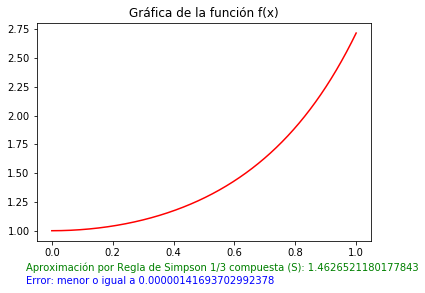

In [13]:
#La función linspace devuelve un array numpy. El tercer parámetro es el número de puntos.
#Se múltiplia este parametro por 100 para suavizar la curva de la función
X_graph = np.linspace(a, b, 100*N)

#Y_graph es un array numpy que guarda los valores de cada X_graph evaluado en la función
Y_graph = f(X_graph)

#Gráfica de la curva
plt.plot(X_graph,Y_graph,'r')

plt.title(f"Gráfica de la función f(x)")
plt.figtext(0.1,0.02, f"Aproximación por Regla de Simpson 1/3 compuesta (S): {S}", color='g')
plt.figtext(0.1, -0.025, f"Error: menor o igual a {E_N}", color='b')
plt.show()

# Nota:
Si se desea utilizar el código, puede entrar a [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb?utm_source=scs-index), subir el cuaderno y ejecutar.